<a href="https://colab.research.google.com/github/Malkith99/Full-Stack-ML-Project/blob/master/Loan_Status_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Title: Loan Status Prediction

Group Number: Group 17

Student Names and Registration Numbers:
1.   Isuranda M.A.K  : EG/2019/3607
2.   Malkith A.V.A   : EG/2019/3664
  

In [1]:
# Import the necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Supress future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# loading the dataset to pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Group17_Loan Status Prediction /Group17_Loan Status Prediction .csv')

In [9]:
# printing the first 5 rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [10]:
# Print the sape of the dataframe
df.shape

(480, 13)

In [42]:
# Seperate the independent and dependent variables
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df.Loan_Status

In [43]:
X.shape

(480, 13)

In [44]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SemiUrban,Urban,Rural
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1,0
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,0,1,0


In [26]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest


In [45]:
X,Y = make_classification(n_samples=480, n_features=13, n_informative=2)  # Replace with your data
X=pd.DataFrame(X)

In [41]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0


In [39]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.293977,-2.537270,-0.200671,-0.560112,-1.815697,0.236065,0.625237,-0.714628,-1.039830,3.538667,0.625009,1.341384,0.286486
1,-0.649501,-0.828109,-0.682260,-1.883664,0.317714,0.096345,0.593623,0.577155,0.527605,-0.007437,-1.671143,-1.031465,-1.221063
2,0.828779,1.129156,-0.750295,0.123307,-1.124395,0.235513,-1.105209,-0.723772,0.446793,0.892705,0.476180,0.299429,0.333374
3,-0.473748,-0.517932,0.622287,0.236649,-0.257001,-0.361615,0.176259,-0.873092,1.111431,0.577245,0.378423,1.118965,0.282250
4,-1.607802,-1.294908,-0.053475,0.016893,-0.579134,0.177896,0.467808,-1.225246,1.180682,1.362235,0.252808,-1.066669,-1.088340


In [138]:
fs=SelectKBest(score_func=mutual_info_classif,k=7)
fs.fit(X,Y)

SelectKBest(k=7, score_func=<function mutual_info_classif at 0x7e561e489c60>)

In [133]:
fs.scores_

array([0.04147999, 0.        , 0.        , 0.59116673, 0.        ,
       0.0058376 , 0.02997984, 0.        , 0.        , 0.        ,
       0.        , 0.02954953, 0.00699083])

In [139]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.513214,1.642673,-0.544114,-1.350347,0.740824,0.603187,-0.162793,-1.110049,0.638392,-0.328618,-1.002187,0.040919,-0.900621
1,0.419706,-0.481766,-0.005560,-0.987068,1.868818,0.844774,1.178513,0.767951,-1.803863,-2.391956,0.519902,-1.373403,0.324459
2,2.095844,-0.581782,-1.051310,0.981960,-1.239053,-1.831682,1.497432,-1.225597,-0.197938,2.067906,-0.103431,1.857702,-1.173880
3,0.969569,-0.728172,-0.385673,1.144517,0.789920,-1.334611,0.434503,1.159681,1.040062,-0.739771,1.253133,0.240206,1.748137
4,1.321304,0.265878,-0.358340,0.023862,-0.649373,-0.247026,-0.647542,-0.171595,-0.066133,2.099722,-0.181224,0.744192,-0.436720


In [134]:
selected_features_mask = fs.get_support()
selected_columns = X.columns[selected_features_mask]
print(selected_columns)

Index([0, 3, 5, 6, 10, 11, 12], dtype='int64')


In [135]:
X_selected = fs.transform(X)
X_selected=pd.DataFrame(X_selected,columns= selected_columns)
X_selected.head()

,0,3,5,6,10,11,12
0,-0.513214,-1.350347,0.603187,-0.162793,-1.002187,0.040919,-0.900621
1,0.419706,-0.987068,0.844774,1.178513,0.519902,-1.373403,0.324459
2,2.095844,0.981960,-1.831682,1.497432,-0.103431,1.857702,-1.173880
3,0.969569,1.144517,-1.334611,0.434503,1.253133,0.240206,1.748137
4,1.321304,0.023862,-0.247026,-0.647542,-0.181224,0.744192,-0.436720


In [19]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SemiUrban,Urban,Rural
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1,0
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,0,1,0


In [ ]:
# Print a concise summary of the pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


**Data Preprocessing and EDA**

---





1.   Handling the Null/Missing Values




In [12]:
# number of missing values in each column
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# dropping the missing values
df = df.dropna()

In [7]:
# recheck the number of missing values in each column
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# Print the sape of the dataframe
df.shape

(480, 13)

Text(0.5, 1.0, 'Distribution of Loan Statuses in Loan Dataset')

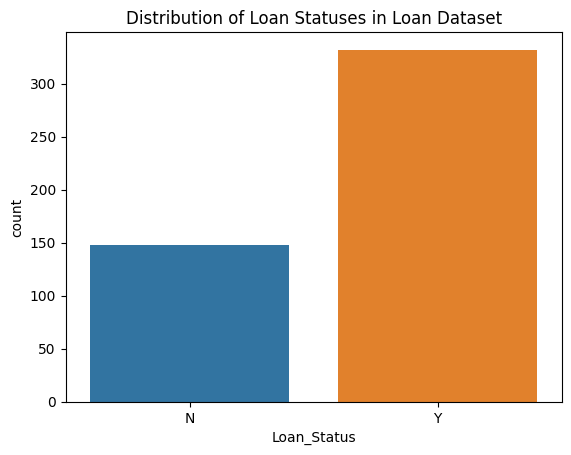

In [ ]:
# Create a countplot to visualize loan status distribution
sns.countplot(x='Loan_Status', hue='Loan_Status', data=df)
plt.title("Distribution of Loan Statuses in Loan Dataset")

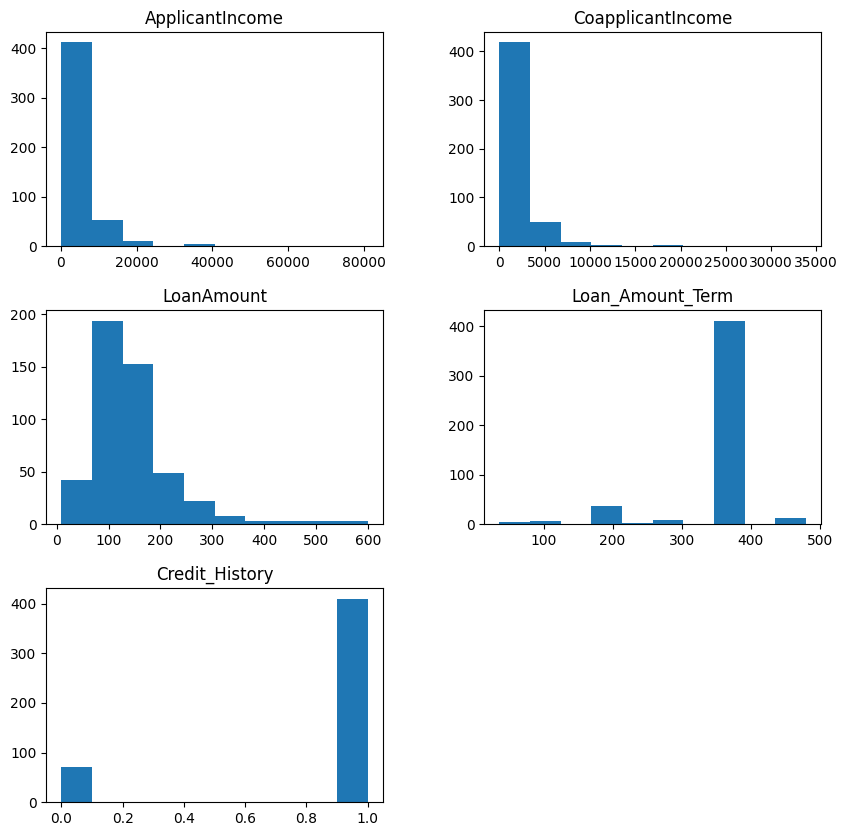

In [ ]:
# Create histograms for numerical features in loan_dataset
columns_to_plot = df.columns[:-1]  # Exclude the last column
df[columns_to_plot].hist(figsize=(10, 10), grid=False)
plt.show()

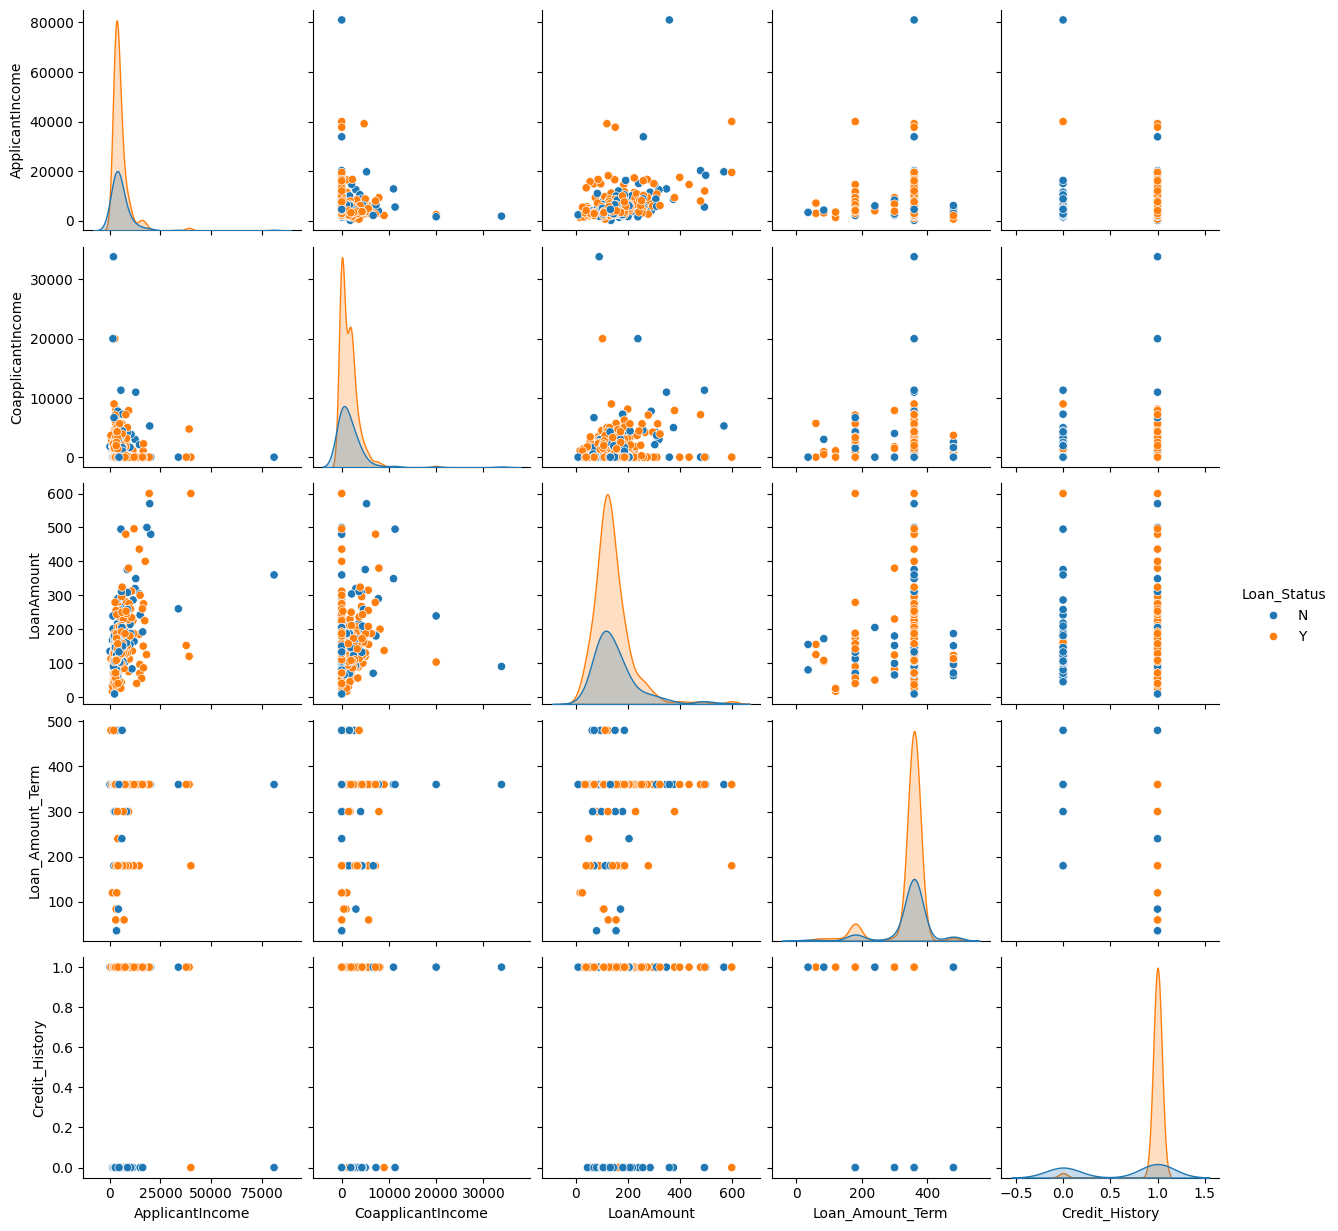

In [ ]:
# Bivariate Analysis (Numerical Features)
sns.pairplot(df, hue="Loan_Status")
plt.show()



2.   Handling Categorical Variables: Label Encoding




In [14]:
# Dependent column values
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [15]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [16]:
# Recheck the dependent values
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


Text(0.5, 1.0, 'Distribution of Loan Statuses by Education Level')

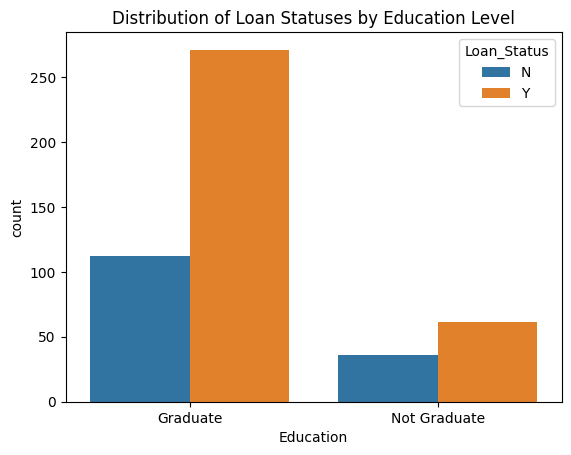

In [ ]:
# Create a countplot to visualize loan status distribution by education level
sns.countplot(x='Education', hue='Loan_Status', data=df)
plt.title("Distribution of Loan Statuses by Education Level")

Text(0.5, 1.0, 'Distribution of Loan Statuses by Property Area')

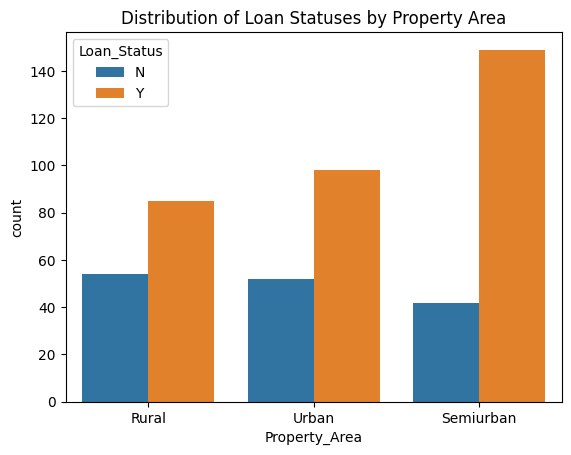

In [ ]:
# Create a countplot to visualize loan status distribution by property area
sns.countplot(x='Property_Area', hue='Loan_Status', data=df)
plt.title("Distribution of Loan Statuses by Property Area")

In [17]:
# columns to be label encoded
columns_to_encode =['Married','Gender','Self_Employed','Loan_Status','Education']

In [18]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each column
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])


In [19]:
#Recheck the Label Encoding
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,Urban,1


2.Handling Categorical Variables : One-Hot Encoding

In [20]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import numpy as np

# List the categorical features
cat_feature = ['Property_Area']

# Define custom category names
custom_categories = [['SemiUrban', 'Urban', 'Rural']]

# Define the encoder without drop='first' and with custom categories
transformer = make_column_transformer(
    (
        OneHotEncoder(categories=custom_categories, handle_unknown='ignore', dtype=np.int64, sparse_output=False),
        cat_feature
    )
)

# Encode the training features
transformed = transformer.fit_transform(df)
transformed_df = pd.DataFrame(transformed, columns=['SemiUrban', 'Urban', 'Rural'])  # Custom column names
transformed_df.index = df.index
df = pd.concat([df, transformed_df], axis=1)
df.drop(cat_feature, axis=1, inplace=True)
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0


In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'SemiUrban',
       'Urban', 'Rural'],
      dtype='object')



3.   Treating Outliers (Using Z score)




In [ ]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.0,480.000000,480.000000
mean,0.820833,0.647917,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.691667,0.0,0.312500,0.289583
std,0.383892,0.478118,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.462287,0.0,0.463996,0.454042
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000,0.0,1.000000,1.000000


Text(0, 0.5, 'Count')

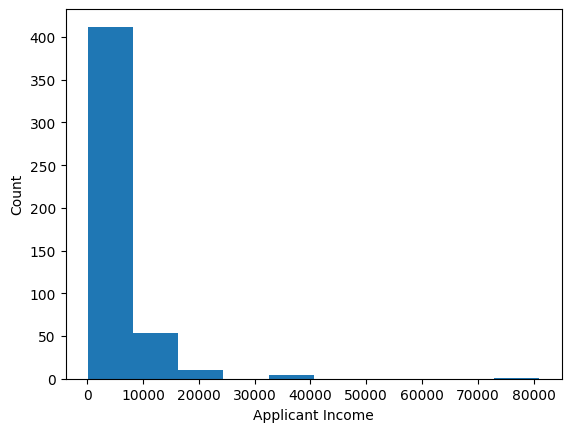

In [ ]:
#Visualize the outliers in ApplicationIncome column
plt.hist(df['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Count')

In [ ]:
#calcluate the mean of the ApplicantIncome
mean=np.mean(df['ApplicantIncome'])
mean

5364.23125

In [ ]:
#calcluate the std of the ApplicantIncome
std=np.std(df['ApplicantIncome'])
std

5662.343743857906

In [ ]:
#calcluate the Z-Score of the ApplicantIncome
df['ApplicantIncome_Z_Score']=(df['ApplicantIncome']-mean)/std

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural,ApplicantIncome_Z_Score
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1,-0.137970
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,-0.417536
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,-0.491180
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0.112280
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0.009319


In [ ]:
#check the upper outlier values in ApplicantIncome Column
count = df[df['ApplicantIncome_Z_Score'] > 3].shape
print(count)

(5, 16)


In [ ]:
#check the lower outlier values in ApplicantIncome Column
count = df[df['ApplicantIncome_Z_Score'] <-3].shape
print(count)

(0, 16)


In [ ]:
# Reset the index of the DataFrame and drop the original index
df = df.reset_index(drop=True)

In [ ]:
#Store the indexes of outliers in ApplicantIncome Column
outlier_indexes=[]
outlier_indexes.extend(df.index[df['ApplicantIncome_Z_Score'] >3])
outlier_indexes

[120, 142, 144, 319, 347]

In [ ]:
#Drop the outliers from the dataset
new_df=df.drop(df.index[outlier_indexes])
df.shape[0],new_df.shape[0]  # check the removed columns

(480, 475)

In [ ]:
#remove the newly added column from the data set
new_df=new_df.drop('ApplicantIncome_Z_Score',axis=1)
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0


Text(0, 0.5, 'Count')

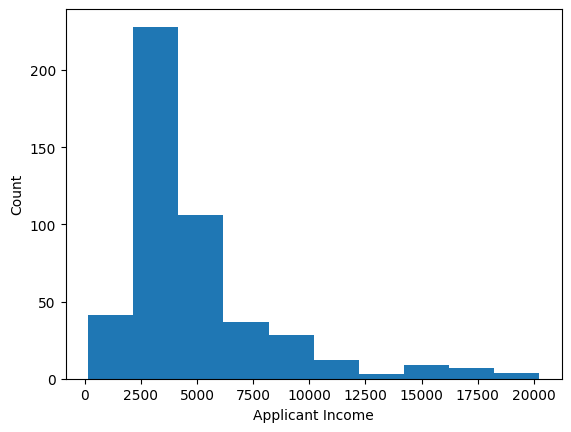

In [ ]:
#Visualize the removed outliers
plt.hist(new_df['ApplicantIncome'])
plt.xlabel('Applicant Income')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

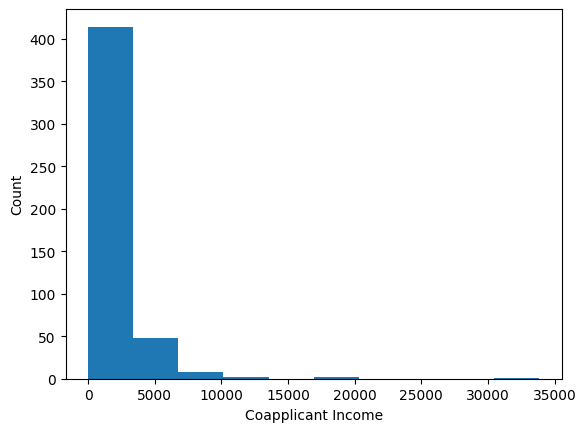

In [ ]:
#Visualize the outliers in CoapplicantIncome column
plt.hist(new_df['CoapplicantIncome'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')

In [ ]:
#calcluate the mean of the CoapplicantIncome
mean=np.mean(new_df['CoapplicantIncome'])
mean

1587.7366736602946

In [ ]:
#calcluate the STD of the CoapplicantIncome
std=np.std(new_df['CoapplicantIncome'])
std

2620.6449490031996

In [ ]:
#calcluate the Z-Score of the CoapplicantIncome
new_df['CoapplicantIncome_Z_Score']=(new_df['CoapplicantIncome']-mean)/std
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural,CoapplicantIncome_Z_Score
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1,-0.030426
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,-0.605857
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,0.293921
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,-0.605857
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0.995275


In [ ]:
#check the upper outlier values in CoapplicantIncome Column
count = new_df[new_df['CoapplicantIncome_Z_Score'] > 3].shape
print(count)

(5, 16)


In [ ]:
#check the lower outlier values in CoapplicantIncome Column
count = new_df[new_df['CoapplicantIncome_Z_Score'] <-3].shape
print(count)

(0, 16)


In [ ]:
# Reset the index of the DataFrame and drop the original index
new_df = new_df.reset_index(drop=True)

In [ ]:
#Store the indexes of outliers in CoapplicantIncome Column
outlier_indexes=[]
outlier_indexes.extend(new_df.index[new_df['CoapplicantIncome_Z_Score'] >3])
outlier_indexes

[8, 136, 309, 322, 449]

In [ ]:
#Drop the outliers from the dataset
latest_df=new_df.drop(new_df.index[outlier_indexes])
new_df.shape[0],latest_df.shape[0]  # check the removed columns

(475, 470)

In [ ]:
#remove the newly added column from the dataset
latest_df=latest_df.drop('CoapplicantIncome_Z_Score',axis=1)
latest_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0


Text(0, 0.5, 'Count')

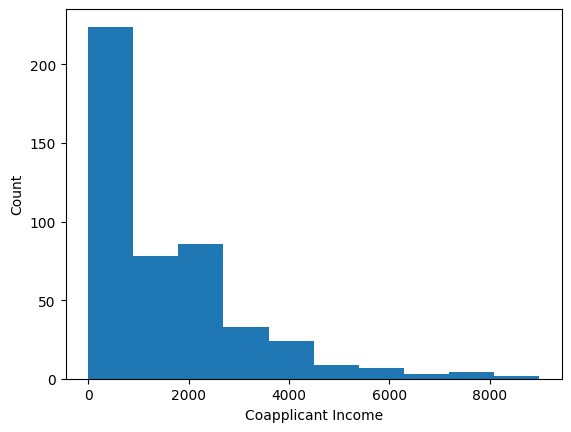

In [ ]:
#Visualize the removed outliers in CoapplicantIncome column
plt.hist(latest_df['CoapplicantIncome'])
plt.xlabel('Coapplicant Income')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

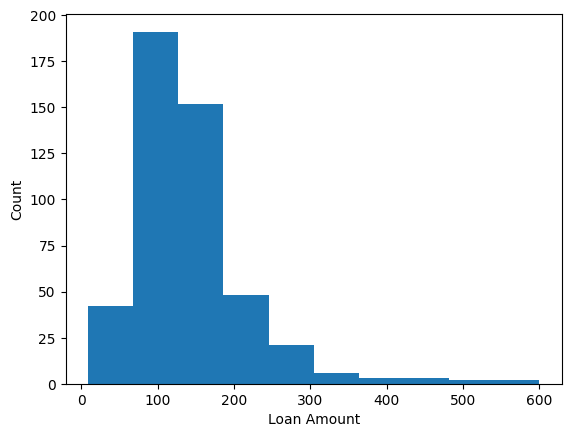

In [ ]:
#Visualize the Outliers in LoanAmount column
plt.hist(latest_df['LoanAmount'])
plt.xlabel('Loan Amount')
plt.ylabel('Count')

In [ ]:
#calcluate the mean of the LoanAmount
mean=np.mean(latest_df['LoanAmount'])
mean

141.9255319148936

In [ ]:
#Calculate the std of the LoanAmount
std=np.std(latest_df['LoanAmount'])
std

75.1646475528113

In [ ]:
#Calculate the Z-Score
latest_df['LoanAmount_Z_Score']=(latest_df['LoanAmount']-mean)/std
latest_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural,LoanAmount_Z_Score
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1,-0.185267
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,-1.010123
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,-0.291700
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,-0.012313
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,1.664007


In [ ]:
#check the upper outlier values in LoanAmount Column
count = latest_df[latest_df['LoanAmount_Z_Score'] > 3].shape
print(count)

(10, 16)


In [ ]:
#check the lower outlier values in LoanAmount Column
count = latest_df[latest_df['LoanAmount_Z_Score'] <-3].shape
print(count)

(0, 16)


In [ ]:
# Reset the index of the DataFrame and drop the original index
latest_df = latest_df.reset_index(drop=True)

In [ ]:
#Store the indexes of outliers in LoanAmount Column
outlier_indexes=[]
outlier_indexes.extend(latest_df.index[latest_df['LoanAmount_Z_Score'] >3])
outlier_indexes

[215, 239, 249, 281, 284, 371, 400, 401, 429, 461]

In [ ]:
#Drop the outliers from the dataset
final_df=latest_df.drop(latest_df.index[outlier_indexes])
latest_df.shape[0],final_df.shape[0]  # check the removed columns

(470, 460)

In [ ]:
#remove the newly added column from the dataset
final_df=final_df.drop('LoanAmount_Z_Score',axis=1)

In [ ]:
final_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
0,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0,1
1,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1,0
2,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0
3,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1,0
4,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0


Text(0, 0.5, 'Count')

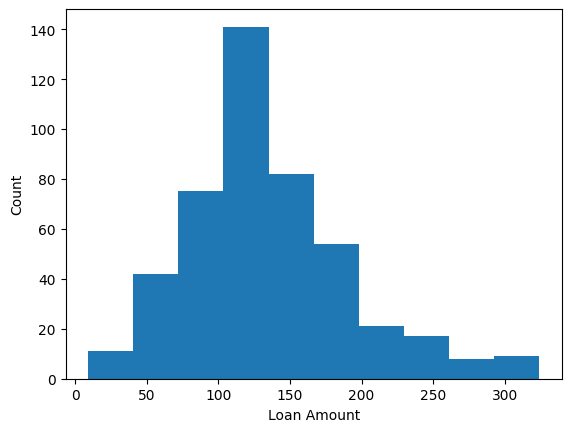

In [ ]:
#Check the removed outliers
plt.hist(final_df['LoanAmount'])
plt.xlabel('Loan Amount')
plt.ylabel('Count')



4.   Feature Scaling : Min-Max Scaling




In [ ]:
# Standard Scale the numerical features
from sklearn.preprocessing import MinMaxScaler

num_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
minmax_scalar = MinMaxScaler()
final_df[num_features] = minmax_scalar.fit_transform(final_df[num_features])

NameError: name 'final_df' is not defined

In [ ]:
# Standard Scale the numerical features
from sklearn.preprocessing import MinMaxScaler

num_features = ['ApplicantIncome', 'CoapplicantIncome','LoanAmount','Loan_Amount_Term']
minmax_scalar = MinMaxScaler()
df[num_features] = minmax_scalar.fit_transform(df[num_features])

In [ ]:
final_df.head()

NameError: name 'final_df' is not defined

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,SemiUrban,Urban,Rural
1,LP001003,1,1,1,0,0,0.054830,0.044567,0.201354,0.72973,1.0,0,0,0,1
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.096447,0.72973,1.0,1,0,1,0
3,LP001006,1,1,0,1,0,0.030093,0.069687,0.187817,0.72973,1.0,1,0,1,0
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.223350,0.72973,1.0,1,0,1,0
5,LP001011,1,1,2,0,1,0.065145,0.124006,0.436548,0.72973,1.0,1,0,1,0




5.   Train-Test Split



In [126]:
# Seperate the independent and dependent variables
X = final_df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = final_df.Loan_Status

NameError: name 'final_df' is not defined

In [21]:
# Seperate the independent and dependent variables
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y = df.Loan_Status

In [22]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,SemiUrban,Urban,Rural
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,0,1,0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,0,1,0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,0,1,0
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,0,1,0


In [ ]:
Y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [74]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, Y, test_size=0.3, random_state=42)

<Axes: xlabel='Loan_Status'>

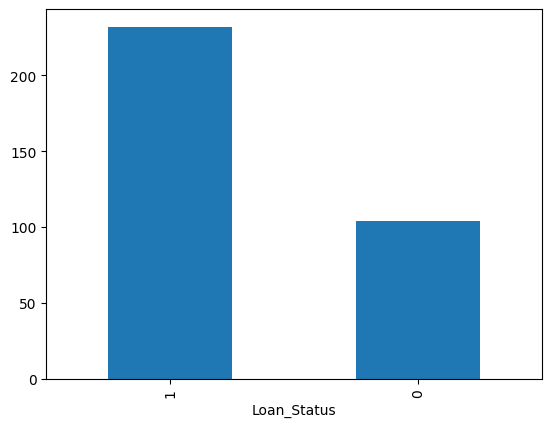

In [75]:
Y_train.value_counts().plot(kind='bar')

In [76]:
!pip install imbalanced-learn

In [77]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_train,Y_train=smote.fit_resample(X_train,Y_train)

<Axes: xlabel='Loan_Status'>

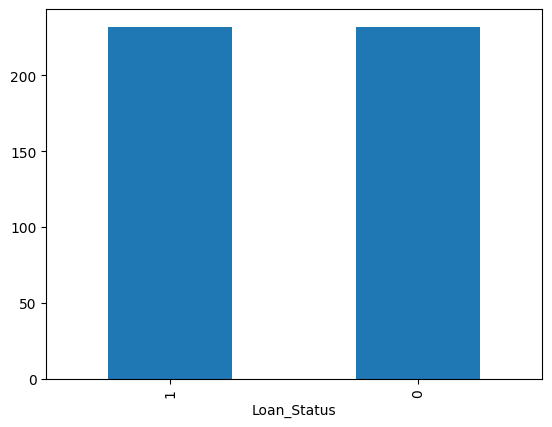

In [79]:
Y_train.value_counts().plot(kind='bar')

In [80]:
# Lenth of the training + validation sets
len(X_train)

464

In [81]:
# Length of the testing set
len(X_test)

144

In [82]:
#Training the model using SVM classifier
classifierSVM = svm.SVC(kernel='linear')

In [83]:
classifierSVM.fit(X_train,Y_train)

SVC(kernel='linear')

In [84]:
X_train_prediction = classifierSVM.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7241379310344828


In [85]:
X_test_prediction = classifierSVM.predict(X_test)
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7986111111111112


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Set up the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10, 100],
    'degree': [2, 3, 4, 5],  # Used for 'poly' kernel
    'coef0': [0.0, 0.1, 0.5, 1.0],  # Used for 'poly' and 'sigmoid' kernels
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=classifierSVM, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, Y_train)

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

In [ ]:
# accuracy score on training data
# Evaluate the model
X_train_prediction = grid_search.predict(X_train)
training_data_accuray = grid_search.score(X_train,Y_train)
print('Accuracy on training data : ', training_data_accuray)

In [ ]:
#Training the support Vector Macine model
classifierSVM.fit(X_train,Y_train)

SVC(kernel='linear')

**Model Evaluation : SVM Classifier**

In [ ]:
# accuracy score on training data
X_train_prediction = classifierSVM.predict(X_train)
training_data_accuray = accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  0.7319819819819819


In [ ]:
# Confusion Matrix on testing data
X_test_prediction = classifierSVM.predict(X_test)
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[20 18]
 [19 81]]


In [ ]:
# accuracy score on testing data
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7318840579710145


In [ ]:
# Precision on test data
precision = precision_score(Y_test, X_test_prediction)
print("Precision on test data:", precision)

Precision on test data: 0.8181818181818182


In [ ]:
# Recall on testing data
recall = recall_score(Y_test, X_test_prediction)
print("Recall on test data:", recall)

Recall on test data: 0.81


In [ ]:
# F1 Score on testing data
f1 = f1_score(Y_test, X_test_prediction)
print("F1 Score on test data:", f1)

F1 Score on test data: 0.8140703517587939


**Training the Model :Random Forest**

In [ ]:
#Training the model using Random Forest classifier
classifierRF = RandomForestClassifier(n_estimators=42)
#classifierRF.fit(X_valtrain,Y_valtrain)


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=classifierRF, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [ ]:
# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")

Best parameters found: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
# accuracy score on training data
# Evaluate the model
X_train_prediction = grid_search.predict(X_train)
training_data_accuray = grid_search.score(X_train,Y_train)
print('Accuracy on training data : ', training_data_accuray)

Accuracy on training data :  1.0


In [ ]:
# Confusion Matrix on testing data
X_test_prediction = classifierRF.predict(X_test)
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix on test data:")
print(conf_matrix)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# accuracy score on testing data
test_data_accuray = accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data : ', test_data_accuray)

Accuracy on test data :  0.7666666666666667


In [ ]:
# Precision on test data
precision = precision_score(Y_test, X_test_prediction)
print("Precision on test data:", precision)

Precision on test data: 0.7755102040816326


In [ ]:
# Recall on testing data
recall = recall_score(Y_test, X_test_prediction)
print("Recall on test data:", recall)

Recall on test data: 0.926829268292683


In [ ]:
# F1 Score on testing data
f1 = f1_score(Y_test, X_test_prediction)
print("F1 Score on test data:", f1)

F1 Score on test data: 0.8444444444444446
